In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import scipy as sp
import statistics

Using TensorFlow backend.


In [2]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
# 各ラベルごとに100枚用意
x_for_labels = np.array([x_train[y_train==label][:100] for label in range(10)])
x_for_labels.shape

(10, 100, 28, 28)

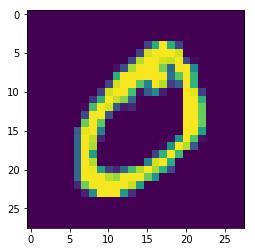

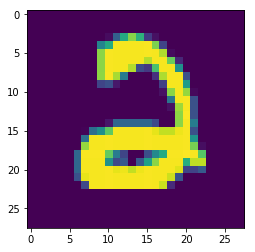

In [5]:
# label=0, 0枚目の画像を表示
plt.imshow(x_for_labels[0][0])
plt.show()

# label=2, 5枚目の画像を表示
plt.imshow(x_for_labels[2][5])
plt.show()

In [6]:
# 縦横の情報を捨ててベクトル化
x_vectorized = x_for_labels.reshape(10, 100, 28*28)
x_vectorized.shape

(10, 100, 784)

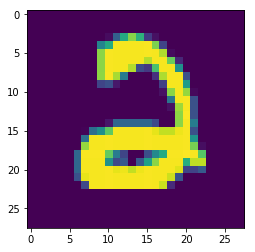

In [7]:
# 正しくベクトル化できているか確認，適当なところを持ってきて行列に再構成
plt.imshow(x_vectorized[2, 5].reshape(28, 28))
plt.show()

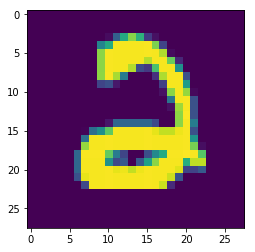

In [9]:
input_x = x_vectorized.reshape(10*100, 784)
plt.imshow(input_x[205].reshape(28, 28))
plt.show()

In [10]:
kmeans = KMeans(n_clusters=10, random_state=0).fit(input_x)
cluster_label = kmeans.labels_
reshaped_cluster_label = cluster_label.reshape(10, 100)

In [11]:
cluster_label.shape

(1000,)

In [12]:
true_labels = np.array([np.ones(100)*label for label in range(10)]).reshape(1000)

In [13]:
# Labelごとにどのクラスタ番号が最頻値となるかを調査
mode_of_label = [statistics.mode(reshaped_cluster_label[label]) for label in range(10)]
print(mode_of_label)

[4, 3, 5, 2, 1, 7, 8, 9, 0, 1]


In [14]:
# 元のラベルにできるだけ一致させたクラスタ番号を付与
relabeled_cluster_label = np.zeros(1000)
for label, mode in enumerate(mode_of_label):
    relabeled_cluster_label[cluster_label==mode] = label

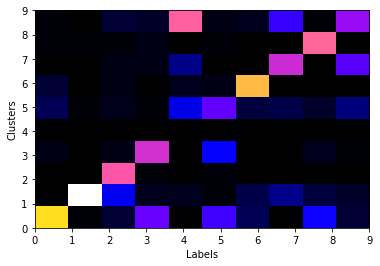

In [15]:
plt.hist2d(true_labels, relabeled_cluster_label, cmap="gnuplot2")
plt.xlabel("Labels")
plt.ylabel("Clusters")
plt.show()